In [1]:
import pandas as pd,numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt

#read the dataset 
loanDS = pd.read_csv("data\loan.csv",low_memory=False)


In [2]:
loanDS.shape


(39717, 111)

In [3]:
#Data Cleaning - Drop Columns that have all Null values

In [4]:
loanDS.dropna(axis='columns', how = 'all',inplace=True)

In [5]:
#Check for columns - 54 columns are dropped
loanDS.shape

(39717, 57)

In [6]:
#Dropping more columns upon data anaylyis-These columns may not be needed

In [7]:
master_frame=loanDS.drop(['emp_title','title','issue_d','total_rec_prncp','total_rec_int','total_rec_late_fee','policy_code','collections_12_mths_ex_med','pymnt_plan','url','desc','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','recoveries','collection_recovery_fee','revol_bal','revol_util','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d','initial_list_status'], axis = 1)

In [8]:
master_frame.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
open_acc                      0
pub_rec                       0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
last_pymnt_amnt               0
applicat

In [9]:
master_frame.shape

(39717, 33)

In [10]:
# We may further drop columns but let us continue with this dataset
# Since we have to analyse data to identify risky loan applicants,
# We may drop rows where loan_status=CURRENT 

In [11]:
master_frame = master_frame[(master_frame['loan_status']=='Fully Paid')
                             | (master_frame['loan_status']=='Charged Off')]
                            

In [12]:
master_frame.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq    24905
mths_since_last_record    35837
open_acc                      0
pub_rec                       0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
last_pymnt_amnt               0
applicat

In [13]:
master_frame.shape

(38577, 33)

In [14]:
master_frame['annual_inc'] = master_frame['annual_inc']/1000

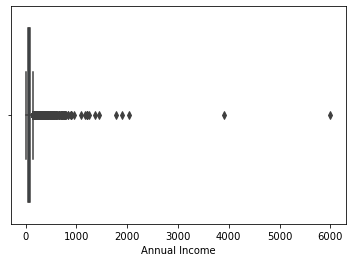

In [15]:
#Plotting Annual Income 
sns.boxplot(x=master_frame['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

In [16]:
master_frame['annual_inc'].describe()

count    38577.000000
mean        68.777974
std         64.218682
min          4.000000
25%         40.000000
50%         58.868000
75%         82.000000
max       6000.000000
Name: annual_inc, dtype: float64

In [17]:
#Removing outliers
ai_low = master_frame["annual_inc"].quantile(0.01)
ai_hi  = master_frame["annual_inc"].quantile(0.99)

#master_frame = master_frame[(master_frame["annual_inc"] < ai_hi) & (master_frame["annual_inc"] > ai_low)]
master_frame = master_frame[(master_frame["annual_inc"] < ai_hi)]

In [18]:
master_frame['annual_inc'].describe()

count    38191.000000
mean        65.313610
std         35.150773
min          4.000000
25%         40.000000
50%         58.000000
75%         80.232000
max        234.000000
Name: annual_inc, dtype: float64

In [19]:
def show_plot(data_df,x_var,hue_var,title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(15,8))
    total = float(len(data_df))
    ax = sns.countplot(x=x_var, hue=hue_var, data=data_df)
    plt.title(title, fontsize=20)
    for p in ax.patches:
       percentage = '{:.1f}%'.format(100 * p.get_height()/total)
       x = p.get_x() + p.get_width()
       y = p.get_height()
       ax.annotate(percentage, (x, y),ha='center')
    plt.show()

In [20]:
#Univariate Analysis - Frequency Distribution of Loan Status

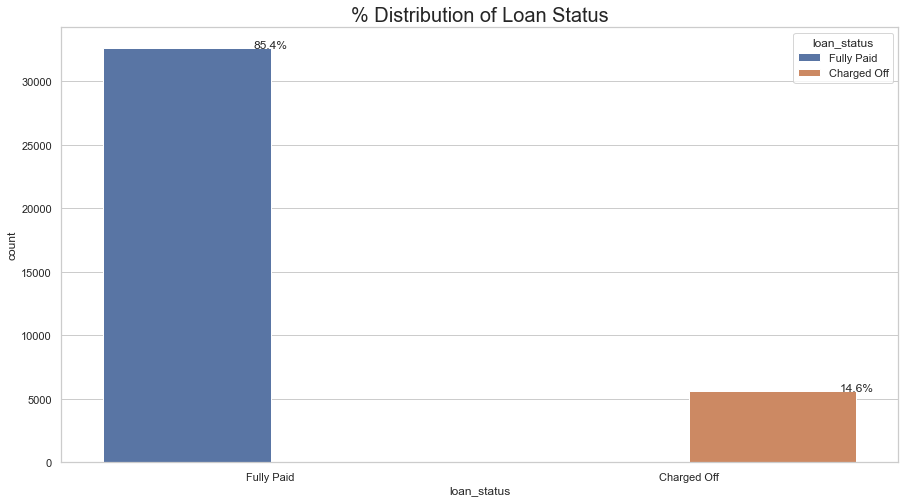

In [21]:
show_plot(master_frame,'loan_status','loan_status','% Distribution of Loan Status')

In [22]:
#The above plot shows 85.4% have Fully Paid the loan and
# 14.6% are 'Charged Off'. Creating 2 datasets - defaulters and paid

In [23]:
defaulters = master_frame[(master_frame['loan_status']=='Charged Off')]

In [24]:
defaulters.shape
defaulters.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_acc,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_amnt,application_type,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,3,0,4,0.0,0.0,1008.71,1008.71,119.66,INDIVIDUAL,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,11,0,13,0.0,0.0,646.02,646.02,152.39,INDIVIDUAL,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,2,0,3,0.0,0.0,1476.19,1469.34,121.45,INDIVIDUAL,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,4,0,9,0.0,0.0,2270.70,2270.70,305.38,INDIVIDUAL,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,14,0,29,0.0,0.0,7471.99,7471.99,325.74,INDIVIDUAL,0.0


In [25]:

paid = master_frame[(master_frame['loan_status']=='Fully Paid')]

In [26]:
paid.shape


(32607, 33)

sns.set()
with sns.axes_style('white'):
    g = sns.factorplot("term", data=defaulters, aspect=2,
                       kind="count", color='steelblue')

In [27]:
#Univariate Analysis - Frequency Distribution of Loan Term for Defaulters

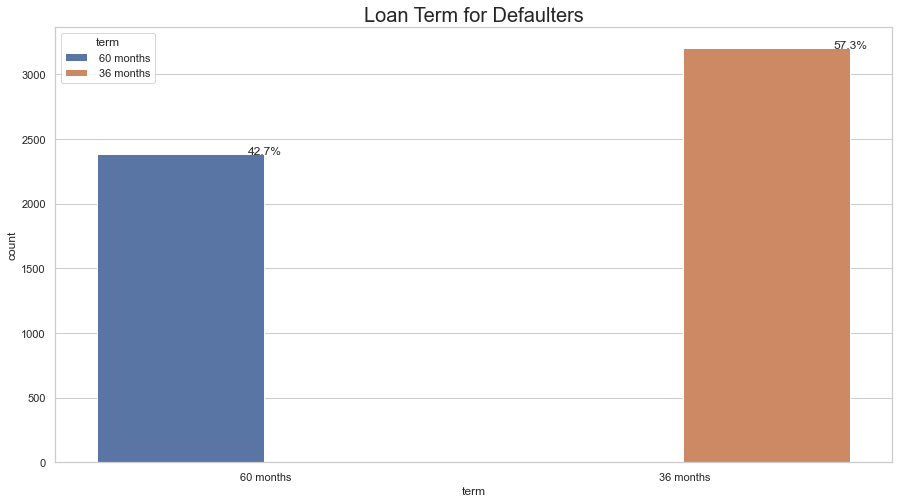

In [28]:
show_plot(defaulters,'term','term','Loan Term for Defaulters')

In [29]:
#Univariate Analysis - Frequency Distribution of Loan Term for Paid Fully

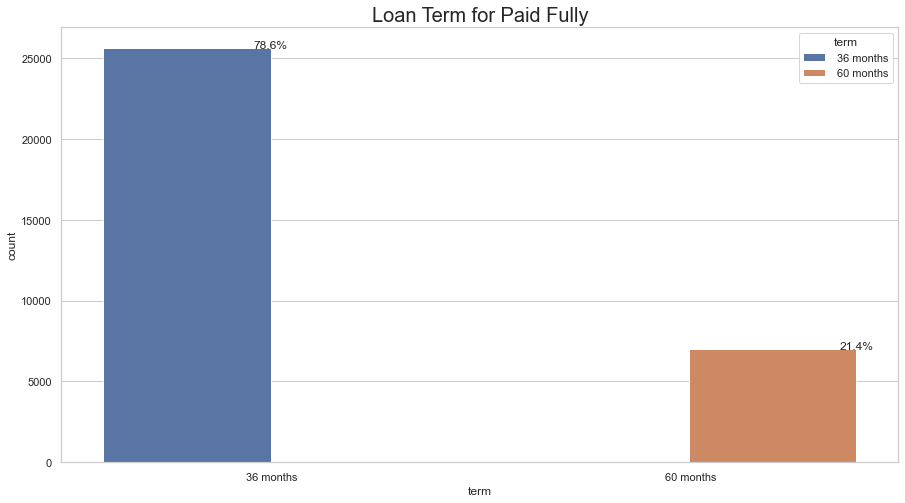

In [30]:
show_plot(paid,'term','term','Loan Term for Paid Fully')

In [31]:
# The above 2 plots show that applicants prefer 36 months loan

In [32]:
#Univariate Analysis - Frequency Distribution of Grade for Paid Fully

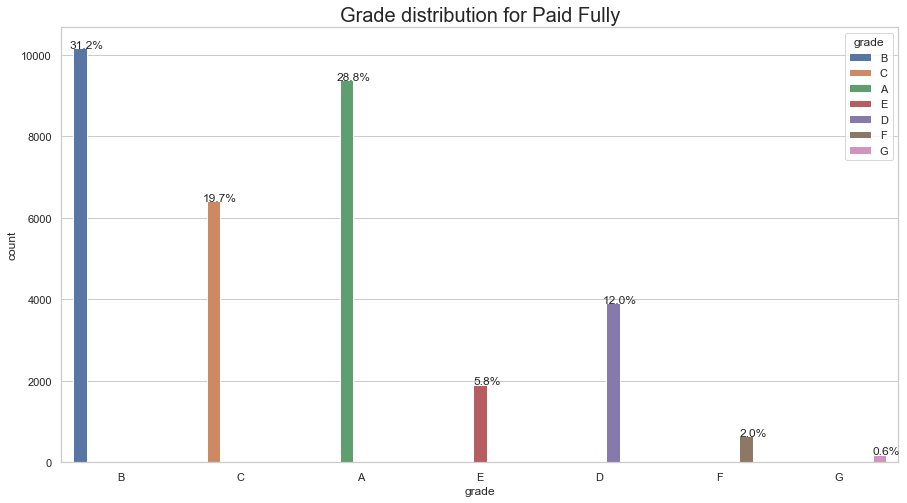

In [33]:
show_plot(paid,'grade','grade','Grade distribution for Paid Fully')

In [34]:
#Univariate Analysis - Frequency Distribution of Grade for Defaulters

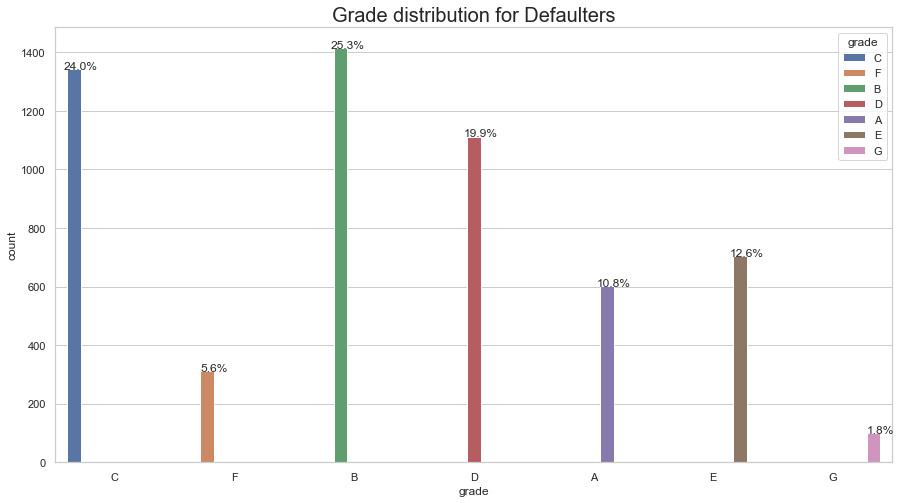

In [35]:
show_plot(defaulters,'grade','grade','Grade distribution for Defaulters')

In [36]:
#Univariate Analysis - Frequency Distribution of Home Ownership for Paid Fully

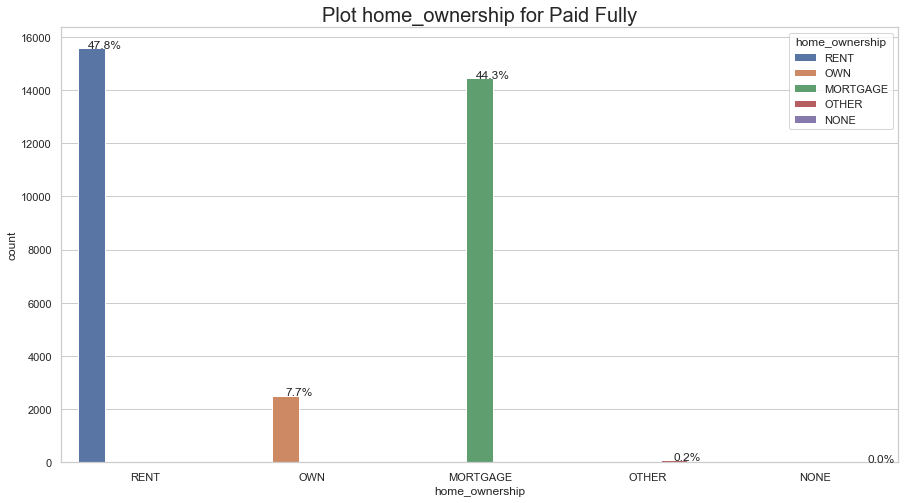

In [37]:
show_plot(paid,'home_ownership','home_ownership','Plot home_ownership for Paid Fully')

In [38]:
#Univariate Analysis - Frequency Distribution of Home Ownership for Defaulters

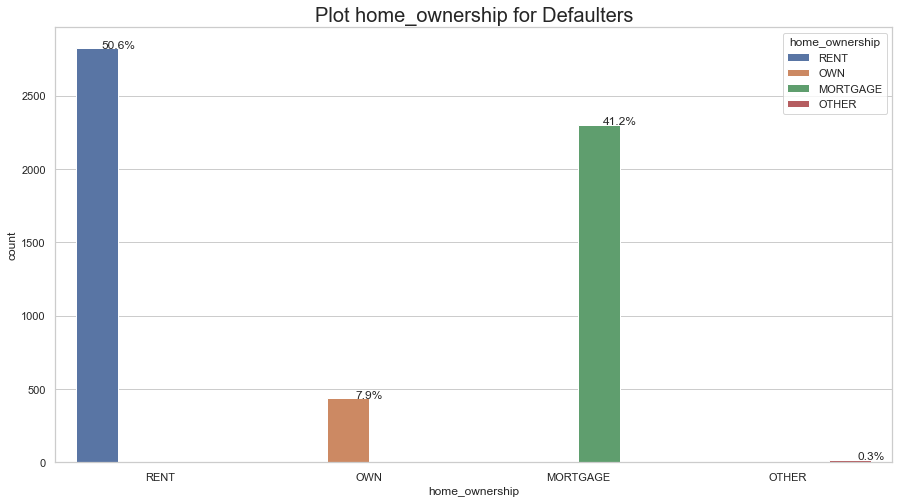

In [39]:
show_plot(defaulters,'home_ownership','home_ownership','Plot home_ownership for Defaulters')

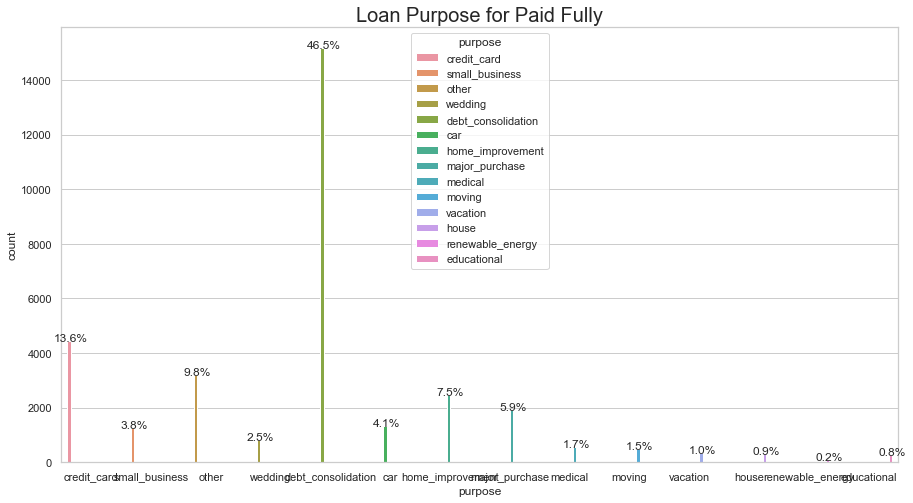

In [40]:
#Univariate Analysis - Frequency Distribution of Loan Purpose for Paid Fully
show_plot(paid,'purpose','purpose','Loan Purpose for Paid Fully')

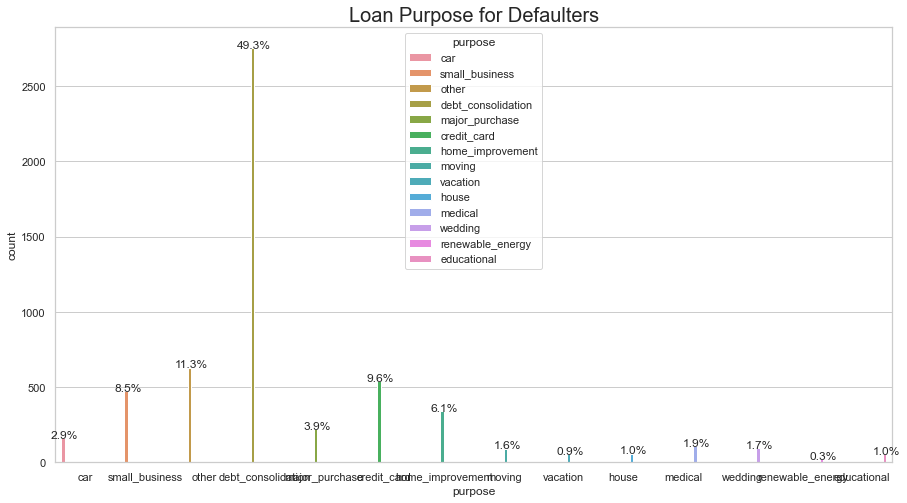

In [41]:
#Univariate Analysis - Frequency Distribution of Loan Purpose for Defaulters
show_plot(defaulters,'purpose','purpose','Loan Purpose for Defaulters')

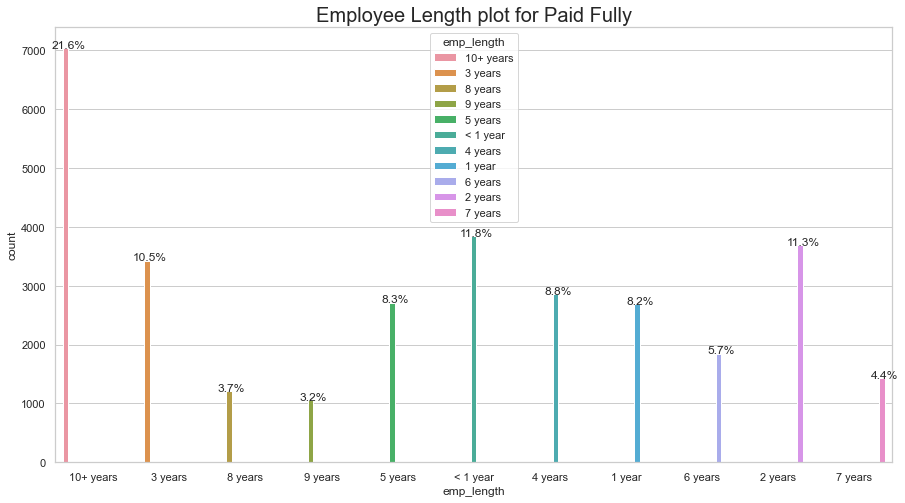

In [42]:
#Univariate Analysis - Frequency Distribution of Employee Length for Paid Fully
show_plot(paid,'emp_length','emp_length','Employee Length plot for Paid Fully')

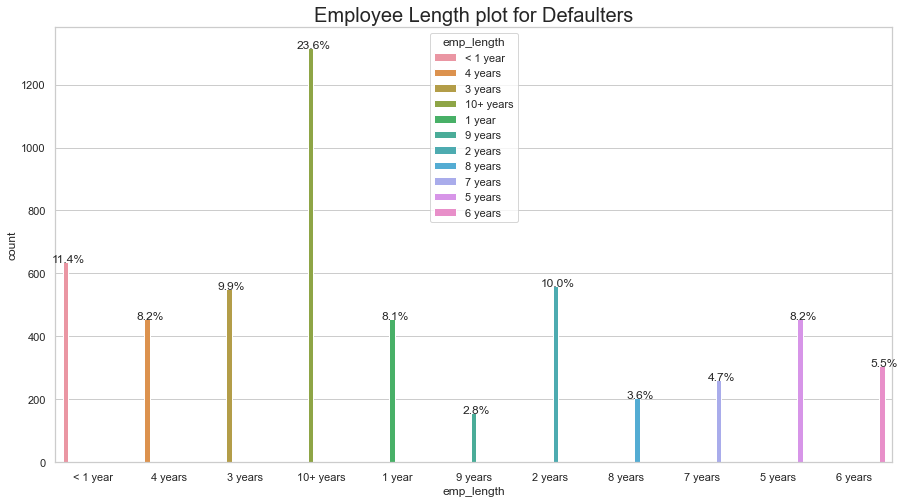

In [43]:
#Univariate Analysis - Frequency Distribution of Employee Length for Defaulters
show_plot(defaulters,'emp_length','emp_length','Employee Length plot for Defaulters')

# From the above charts, following observations can be made -
#Paid Fully percentage - 85.4%, Charged Off - 14.6%
#From the defaulters dataset
#Only 23.7% people with Emp_length > 10 years, 66.3% people are less than 10 years
#70% of the defaulters are in Grade B, C and D
#Top 5 reasons for taking loan for Charged Off -
#debt_consolidation - 49.2%
#credit card - 9.6%
#other - 11.2%
#small business - 8.4%
#home improvement - 6.2%
#car - 2.8% 
#Wedding - 
#Medical

#Inserting new columns by calculating loan to income ratio

In [44]:
pd.set_option('mode.chained_assignment', None)
defaulters['loanIncomeRatio'] = defaulters.apply(lambda row: round((row.loan_amnt)/(row.annual_inc),2), axis = 1)

In [45]:
#Removing rows for defaulters where grade is 'F' and 'G'

In [46]:
#Let's drop rows in Charged-OFF where loans are in grade F&G
defaulters.drop(defaulters.loc[defaulters['grade']=='F'].index, inplace=True)

In [47]:
defaulters.drop(defaulters.loc[defaulters['grade']=='G'].index, inplace=True)

In [48]:
defaulters.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_amnt,application_type,pub_rec_bankruptcies,loanIncomeRatio
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0,4,0.0,0.0,1008.71,1008.71,119.66,INDIVIDUAL,0.0,83.33
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,0,3,0.0,0.0,1476.19,1469.34,121.45,INDIVIDUAL,0.0,358.33
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,0,9,0.0,0.0,2270.70,2270.70,305.38,INDIVIDUAL,0.0,300.00
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,0,29,0.0,0.0,7471.99,7471.99,325.74,INDIVIDUAL,0.0,100.00
21,1039153,1269083,21000,21000,21000.0,36 months,12.42%,701.73,B,B4,...,0,38,0.0,0.0,14025.40,14025.40,701.73,INDIVIDUAL,0.0,200.00


In [49]:
#Function to categorize LoanToIncomeratio as LOW, MEDIUM, HIGH

In [50]:
def mapLoanToIncomeratio(x):
    if (x <= 0.3):
       return 'GOOD'
    else:
       return 'POOR'
 

In [51]:
#Function to categorize Employee Length as JUNIOR, MID-LEVEL, SENIOR OR VERY SENIOR

In [52]:
def mapEmpLengthToPostion(x):
    if (x=='< 1 year') or (x=='1 year') or (x=='2 years')  or (x=='3 years'): # or '1 year' or  '2 years' or  '3 years')):
       return 'JUNIOR(0-3)'
    elif (x=='4 years') or (x=='5 years')  or (x=='6 years'):
       return 'MID-LEVEL(4-6)'
    elif (x=='7 years') or (x=='8 years')  or (x=='9 years'):
       return 'SENIOR(7-9)'
    else:
       return 'VERY SENIOR(10+)'
 

In [53]:
#Function to categorize DTI as DTI-LTE5, DTI-LTE10, DTI-LTE15,DTI-LTE20 OR VERYHIGH-DTI

In [54]:
def groupDTI(x):
    if (x <= 5):
       return 'DTI-LTE5'
    elif (5 > x <=10):
       return 'DTI-LTE10'
    elif (10 > x <=15):
       return 'DTI-LTE15'
    elif (15> x <=20):
       return 'DTI-LTE20'
    else:
       return 'VERYHIGH-DTI'
 

In [55]:
defaulters['loanIncomeRatio'] = defaulters['loanIncomeRatio'].apply(mapLoanToIncomeratio)

In [56]:
defaulters['dti'] = defaulters['dti'].apply(groupDTI)

In [57]:
defaulters['emp_length'] = defaulters['emp_length'].apply(mapEmpLengthToPostion)

In [58]:
defaulters.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_amnt,application_type,pub_rec_bankruptcies,loanIncomeRatio
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0,4,0.0,0.0,1008.71,1008.71,119.66,INDIVIDUAL,0.0,POOR
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,0,3,0.0,0.0,1476.19,1469.34,121.45,INDIVIDUAL,0.0,POOR
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,0,9,0.0,0.0,2270.70,2270.70,305.38,INDIVIDUAL,0.0,POOR
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,0,29,0.0,0.0,7471.99,7471.99,325.74,INDIVIDUAL,0.0,POOR
21,1039153,1269083,21000,21000,21000.0,36 months,12.42%,701.73,B,B4,...,0,38,0.0,0.0,14025.40,14025.40,701.73,INDIVIDUAL,0.0,POOR


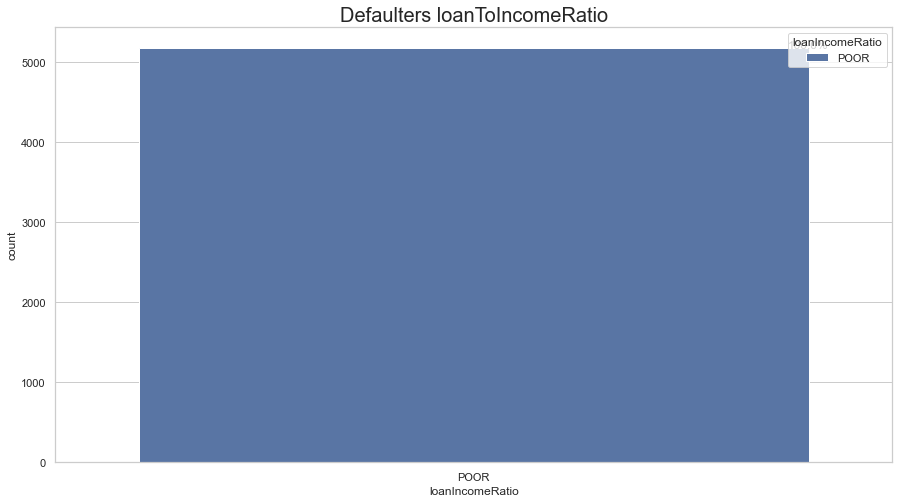

In [59]:
#Univariate analysis of loanIncomeRatio
show_plot(defaulters,'loanIncomeRatio','loanIncomeRatio','Defaulters loanToIncomeRatio')

In [60]:
#Bivariate Analysis - Plot of Defaulters Employee Length and LoanToIncome Ratio

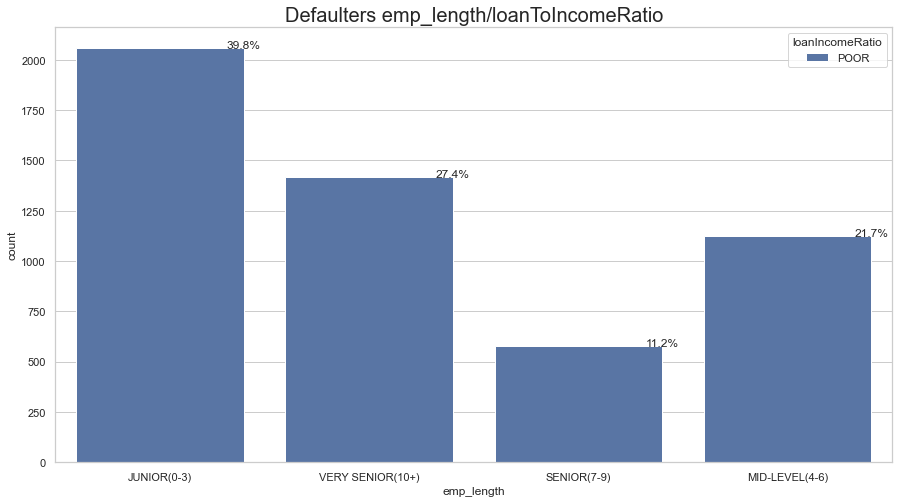

In [61]:
show_plot(defaulters,'emp_length','loanIncomeRatio','Defaulters emp_length/loanToIncomeRatio')

In [62]:
print(defaulters['dti'])

1            DTI-LTE5
9        VERYHIGH-DTI
12          DTI-LTE20
14          DTI-LTE15
21          DTI-LTE20
             ...     
39666       DTI-LTE20
39667    VERYHIGH-DTI
39668    VERYHIGH-DTI
39678       DTI-LTE20
39688       DTI-LTE20
Name: dti, Length: 5173, dtype: object


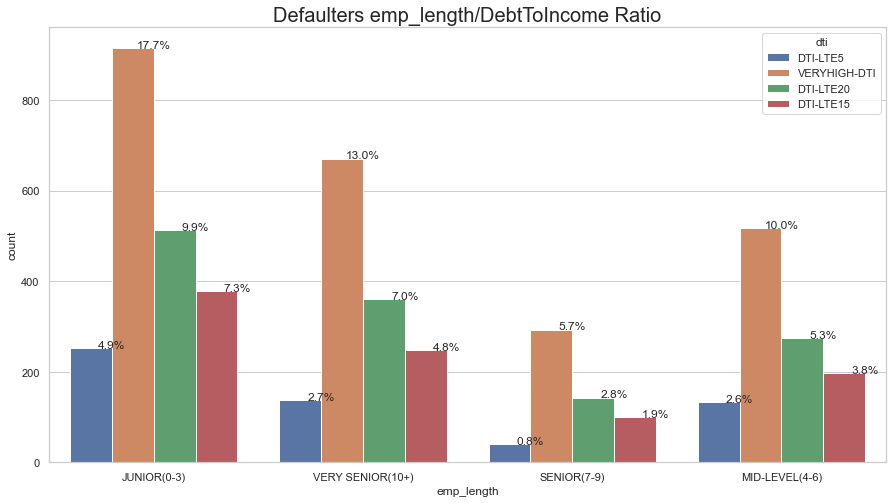

In [63]:
show_plot(defaulters,'emp_length','dti','Defaulters emp_length/DebtToIncome Ratio')

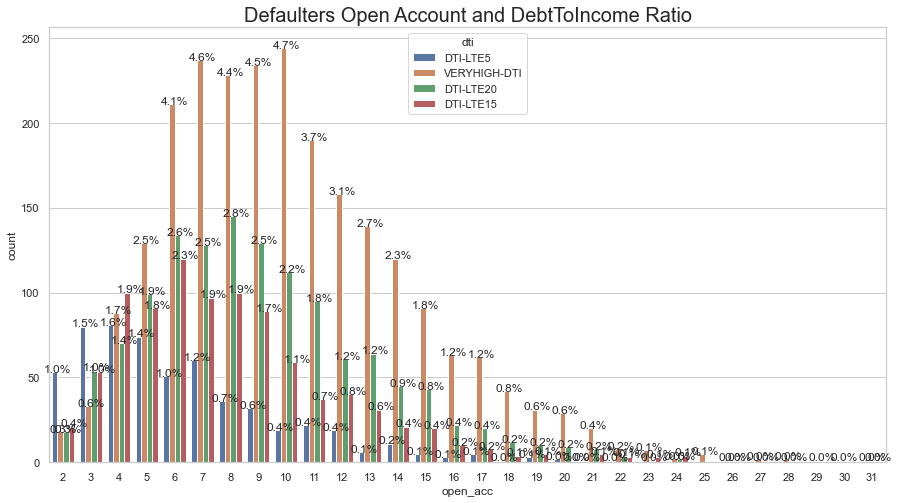

In [64]:
show_plot(defaulters,'open_acc','dti','Defaulters Open Account and DebtToIncome Ratio')

In [65]:
# As the number of open accounts increases, DebtToIncomeRatio increases

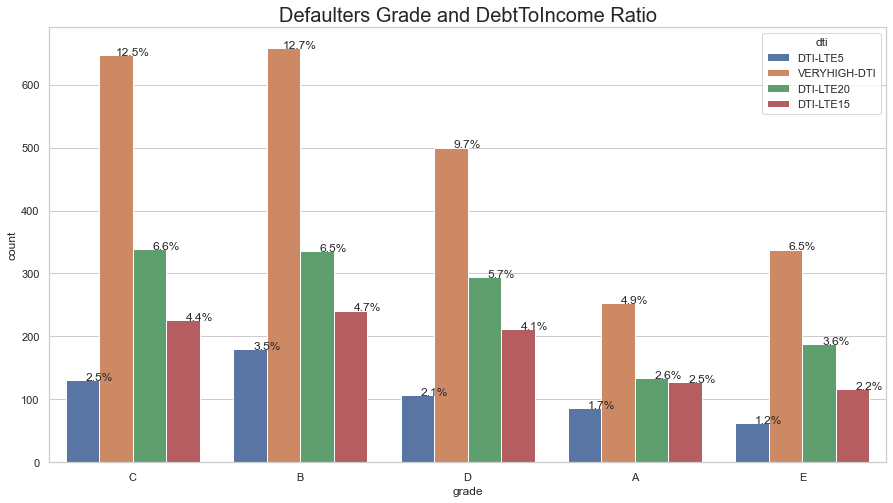

In [66]:
show_plot(defaulters,'grade','dti','Defaulters Grade and DebtToIncome Ratio')

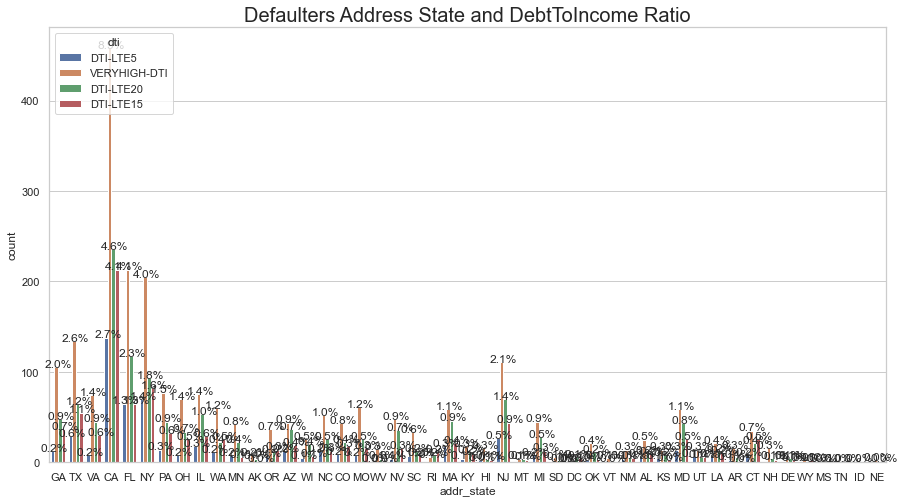

In [67]:
show_plot(defaulters,'addr_state','dti','Defaulters Address State and DebtToIncome Ratio')

In [68]:
#Defaulter in state of California have very high DebtToIncomeRatio

In [69]:
#Recommendations
#Applicants at Junior level and Very Senior level (10+ years) with High and Very High DTI are risky applicants
#Applicants in state of CA have  high DTI so verification process should be followed.
#Applicants whose loan purpose is Debt consolidation, Others, small business have high risk of being charged off
#Loans in grade B and C are more likely to be charged-off
